# ảnh bộ lọc IHP miền KG và miền TS

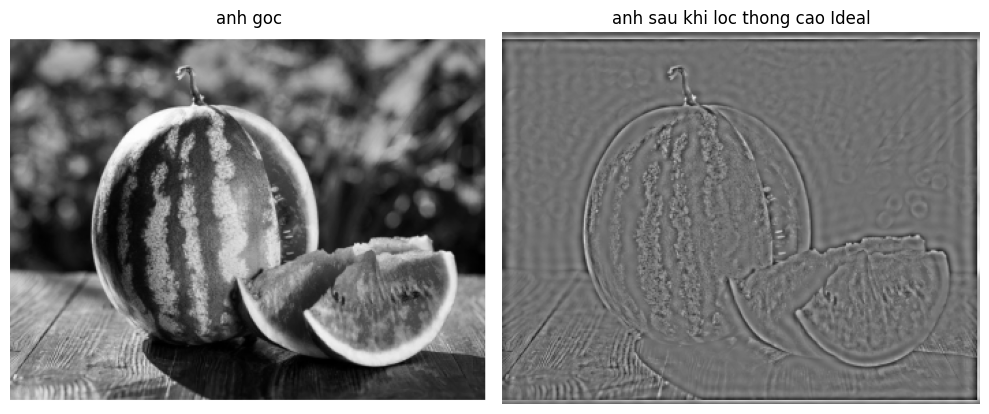

In [10]:
# ideal_highpass_duahau_show_original.py
# loc thong cao Ideal cho anh Duahau.png va hien thi ket qua

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === a. doc anh xam ===
img = Image.open("C:/ImageProcessing/Doan-xulyanh/img/Duahau.png").convert("L")
f = np.array(img, dtype=np.float64)
P, Q = f.shape

# === b. tao bo loc thong cao Ideal ===
D0 = 30  # ban kinh cat
u = np.arange(P)
v = np.arange(Q)
U, V = np.meshgrid(u, v, indexing='ij')
D2 = (U - P/2)**2 + (V - Q/2)**2
H = np.ones((P, Q))
H[D2 <= D0**2] = 0  # loai bo tan so thap

# === c. bien doi Fourier ===
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)

# === d. nhan voi bo loc ===
G_shift = F_shift * H

# === e. bien doi nguoc ===
G = np.fft.ifftshift(G_shift)
g = np.fft.ifft2(G)
g_real = np.real(g)

# === f. chuan hoa ve 0–255 ===
g_min, g_max = g_real.min(), g_real.max()
g_norm = (g_real - g_min) / (g_max - g_min) * 255
g_uint8 = np.clip(g_norm, 0, 255).astype(np.uint8)

# === g. hien thi anh goc va anh sau khi loc ===
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("anh goc")
plt.imshow(f, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("anh sau khi loc thong cao Ideal")
plt.imshow(g_uint8, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
